# Machine Learning Regression Model

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df = df.dropna()
print(df.isna().sum())


Close                        0
High                         0
Low                          0
Open                         0
Volume                       0
change_tomorrow              0
change_tomorrow_direction    0
dtype: int64


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow
print(target.isna().sum())
explanatory = df[['Open','High','Low','Close','Volume']]

0


### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [4]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15)

### Calculate the predictions

In [6]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549151,0.097842
2016-12-09,0.321693,0.173150
2016-12-12,1.286142,0.097842
2016-12-13,-0.478631,-0.016542
2016-12-14,-0.159796,0.173150
...,...,...
2025-02-27,1.123452,0.097842
2025-02-28,-2.187959,0.173150
2025-03-03,0.030878,0.097842


### Evaluate the model: compare predictions with the reality

In [7]:
error = df_predictions.change_tomorrow - df_predictions.prediction
error.sum().round(2)

np.float64(0.0)

In [10]:
error_squared = error**2
error_squared.sum()


np.float64(3657.746508436612)

In [11]:
error_squared.mean()

np.float64(1.7670272987616484)

In [12]:
error_squared_mean = error_squared.mean()
error_squared_mean

np.float64(1.7670272987616484)

In [13]:
import numpy as np

rmse = np.sqrt(error_squared_mean)
rmse

np.float64(1.329295790545373)

In [14]:
error.std()

np.float64(1.3296169928674575)

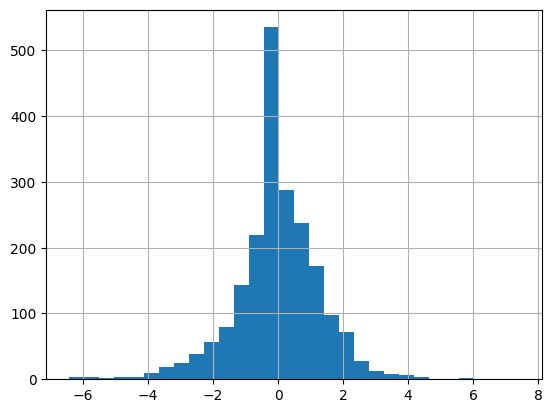

In [15]:
error.hist(bins=30);

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png)

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [16]:
import pickle

In [17]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)